In [1]:
import tensorflow as tf
import keras as keras
import sys

In [2]:
## 00. 사용할 패키지 불러오기
from keras.datasets import mnist           # 데이터 셋 불러오기
from keras.models import Sequential        
from keras.layers import Dense, Activation 
from keras.utils import np_utils

In [3]:
### 데이터 셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_n = X_train.copy()
y_train_n = y_train.copy()
X_test_n = X_test.copy()
y_test_n = y_test.copy()

In [6]:
# 데이터 셋 크기
# 60000개의 학습용 데이터 셋, 10000개의 테스트 데이터 셋
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


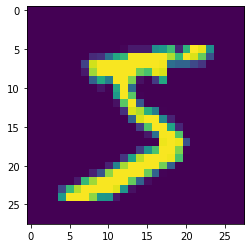

In [7]:
import matplotlib.pyplot as plt

### x_train 의 하나의 데이터 확인
### 60000장의 이미지( 28, 28 숫자데이터)

plt.imshow(X_train[0])

In [8]:
## 데이터 셋의 변경 60000, 28, 28  -> 60000, 784 (28*28)
## 데이터 셋의 변경 10000, 28, 28  -> 10000, 784 (28*28)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [9]:
## 데이터 셋의 변경 60000,   -> 60000, 10 (28*28)
## 데이터 셋의 변경 10000,   -> 10000, 10 (28*28)
print(y_train.shape, y_test.shape)
print(y_train[0:5])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
## 데이터 자료형 변경
## 01. 실수형 변경.
## 02. 값의 범위를 정규화(0~255) -> 0~1로 변경
print(X_train[0])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
model = Sequential()
model.add( Dense(units=64, input_dim=28*28, activation='tanh')) #입력층(28*28=784노드) - 은닉층(64개노드)
model.add( Dense(32))
model.add( Activation('tanh') )
model.add( Dense(32))
model.add( Activation('tanh') )
# 한줄로 한다면 
# model.add(Dense(32, activation='tanh'))

model.add(Dense(units=10, activation='softmax'))                # 출력층(10개 노드) 

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [13]:
# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test),
                 epochs=10,
                 batch_size=100,
                 verbose=1)

Epoch 1/10
600/600 [==============================] - 5s 4ms/step - loss: 1.1108 - accuracy: 0.7199 - val_loss: 0.6639 - val_accuracy: 0.8426
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.5605 - accuracy: 0.8637 - val_loss: 0.4574 - val_accuracy: 0.8881
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4288 - accuracy: 0.8904 - val_loss: 0.3745 - val_accuracy: 0.9028
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3655 - accuracy: 0.9027 - val_loss: 0.3308 - val_accuracy: 0.9102
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.9115 - val_loss: 0.3006 - val_accuracy: 0.9169
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2993 - accuracy: 0.9177 - val_loss: 0.2803 - val_accuracy: 0.9212
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2782 - accuracy: 0.9227 - val_loss: 0.2629 - val_accuracy: 0.9263
Epoch 

In [14]:
# 값 확인
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

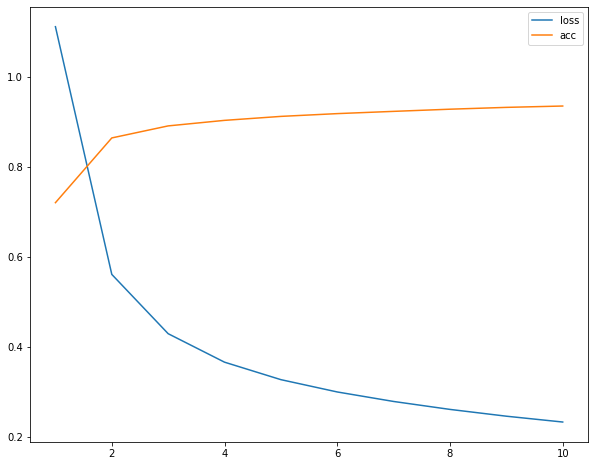

In [15]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

In [16]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)  # 최종 데이터 loss와 정확도(accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.2256 - accuracy: 0.9362
## evaluation loss and_metrics ##
[0.22562789916992188, 0.9362000226974487]


Mnist 데이터 셋

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [18]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [19]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [20]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [21]:
# 3. 모델의 오차함수, 최적화 함수 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [23]:
%%time

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
early_stopping = EarlyStopping(patience = 30) # 조기종료 콜백함수 정의
hist = model.fit(X_train, y_train, 
                 epochs=3000, 
                 batch_size=10, 
                 validation_data=(X_val, y_val), 
                 callbacks=[early_stopping])

Epoch 1/3000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.4739 - accuracy: 0.8655 - val_loss: 0.2474 - val_accuracy: 0.9280
Epoch 2/3000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.2340 - accuracy: 0.9316 - val_loss: 0.2032 - val_accuracy: 0.9402
Epoch 3/3000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1776 - accuracy: 0.9476 - val_loss: 0.1678 - val_accuracy: 0.9526
Epoch 4/3000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1453 - accuracy: 0.9572 - val_loss: 0.1411 - val_accuracy: 0.9602
Epoch 5/3000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.1231 - accuracy: 0.9635 - val_loss: 0.1288 - val_accuracy: 0.9637
Epoch 6/3000
5000/5000 [==============================] - 17s 3ms/step - loss: 0.1059 - accuracy: 0.9683 - val_loss: 0.1322 - val_accuracy: 0.9633
Epoch 7/3000
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0

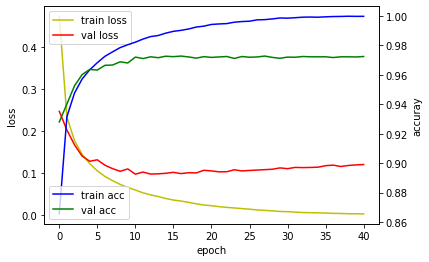

In [24]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

패션 데이터

In [26]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

In [27]:
fashion_mnist = keras.datasets.fashion_mnist


# 4개의 데이터 셋 반환(numpy 배열)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [28]:
print("학습용 데이터 : x: {}, y:{}".format(train_images.shape, train_labels.shape) )
print("테스트 데이터 : x: {}, y:{}".format(test_images.shape, test_labels.shape) )

학습용 데이터 : x: (60000, 28, 28), y:(60000,)
테스트 데이터 : x: (10000, 28, 28), y:(10000,)


In [29]:
from tensorflow.keras import Sequential

In [34]:
model = Sequential()
model.add( Dense(units=64, input_dim=784, activation="relu"))
model.add( Dense(units=32,  activation="relu"))
model.add( Dense(units=10,  activation="softmax"))

model.compile(loss= "categorical_crossentropy" , 
              optimizer="adam", 
              metrics=["accuracy"])

model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=30,
          batch_size=200)

Epoch 1/30
250/250 [==============================] - 2s 5ms/step - loss: 0.5527 - accuracy: 0.8412 - val_loss: 0.2322 - val_accuracy: 0.9310
Epoch 2/30
250/250 [==============================] - 1s 4ms/step - loss: 0.2121 - accuracy: 0.9393 - val_loss: 0.1797 - val_accuracy: 0.9465
Epoch 3/30
250/250 [==============================] - 1s 4ms/step - loss: 0.1663 - accuracy: 0.9508 - val_loss: 0.1509 - val_accuracy: 0.9544
Epoch 4/30
250/250 [==============================] - 1s 4ms/step - loss: 0.1369 - accuracy: 0.9598 - val_loss: 0.1317 - val_accuracy: 0.9614
Epoch 5/30
250/250 [==============================] - 1s 4ms/step - loss: 0.1173 - accuracy: 0.9656 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 6/30
250/250 [==============================] - 1s 4ms/step - loss: 0.1034 - accuracy: 0.9701 - val_loss: 0.1140 - val_accuracy: 0.9639
Epoch 7/30
250/250 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.9726 - val_loss: 0.1067 - val_accuracy: 0.9684
Epoch 